#### Prepare

In [2]:
# Import packages
library("microbiome")
library("ggplot2")
library("dplyr")
library("IRanges")
library("lme4")

In [4]:
# Import data
data(peerj32) 
pseq <- peerj32$phyloseq 

head(otu_table(pseq))
head(sample_data(pseq))
head(tax_table(pseq))

,sample-1,sample-2,sample-3,sample-4,sample-5,sample-6,sample-7,sample-8,sample-9,sample-10,⋯,sample-35,sample-36,sample-37,sample-38,sample-39,sample-40,sample-41,sample-42,sample-43,sample-44
Actinomycetaceae,0,2,9,4,0,3,10,24,9,19,⋯,0,0,1,0,12,10,0,5,0,5
Aerococcus,6,6,2,0,13,0,13,21,9,0,⋯,5,26,10,24,0,0,3,3,4,2
Aeromonas,0,16,11,18,0,0,7,0,10,11,⋯,13,25,0,1,0,0,17,13,5,10
Akkermansia,224,186,224,179,241,416,357,276,804,334,⋯,142,229,225,250,1474,2414,245,341,708,343
Alcaligenes faecalis et rel.,0,0,12,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Allistipes et rel.,169,107,194,216,277,312,99,123,44,86,⋯,182,47,309,97,301,258,66,69,181,182


,time,sex,subject,sample,group
,<int>,<fct>,<fct>,<chr>,<fct>
sample-1,1,female,S1,sample-1,Placebo
sample-2,2,female,S1,sample-2,Placebo
sample-3,1,female,S2,sample-3,Placebo
sample-4,2,female,S2,sample-4,Placebo
sample-5,1,female,S3,sample-5,LGG
sample-6,2,female,S3,sample-6,LGG


,Phylum,Family,Genus
Actinomycetaceae,Actinobacteria,Actinobacteria,Actinomycetaceae
Aerococcus,Firmicutes,Bacilli,Aerococcus
Aeromonas,Proteobacteria,Proteobacteria,Aeromonas
Akkermansia,Verrucomicrobia,Verrucomicrobia,Akkermansia
Alcaligenes faecalis et rel.,Proteobacteria,Proteobacteria,Alcaligenes faecalis et rel.
Allistipes et rel.,Bacteroidetes,Bacteroidetes,Allistipes et rel.


#### Abundance boxplot

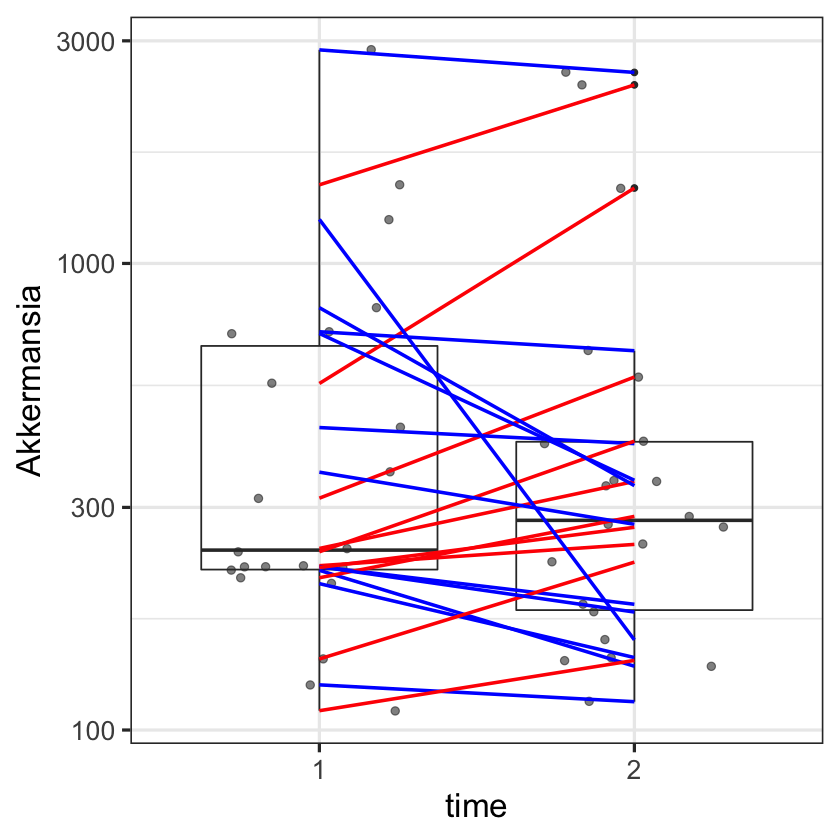

In [5]:
p <- boxplot_abundance(pseq, x = "time", y = "Akkermansia", line = "subject") +
    scale_y_log10()

print(p)

#### Linear model comparison with random effect subject term

In [15]:
# Get sample metadata
dfs <- meta(pseq)

# Add abundance as the signal to model
dfs$signal <- abundances(pseq)["Akkermansia", rownames(dfs)]

# Paired comparison
# with fixed group effect and random subject effect
out <- lmer(signal ~ group + (1|subject), data = dfs)
out0 <- lmer(signal ~ (1|subject), data = dfs)
comp <- anova(out0, out)
pv <- comp[["Pr(>Chisq)"]][[2]]
print(pv)

# Paired comparison
# with fixed group effect and random subject effect
out <- lmer(signal ~ group + (1|subject), data = dfs)
out0 <- lm(signal ~ group, data = dfs)
(mm1<- logLik(out))
(m1 <- logLik(out0))
pchisq(2*(mm1 - m1),df = 1, lower.tail = F)

refitting model(s) with ML (instead of REML)



[1] 0.4556962


'log Lik.' -322.8043 (df=4)

'log Lik.' -346.8049 (df=3)

'log Lik.' 4.259582e-12 (df=4)